# MOVIE RATING PREDICTION

## We will use the IMDB Movies India to Build a model that predicts the rating of a movie based on features like genre, director, and actors..

### Steps :
1. Explore the dataset
2. Data cleaning
3. Data visualization
4. Feature Engineering
5. Model Training





In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor


import warnings
warnings.filterwarnings("ignore")

In [419]:
df = pd.read_csv(r"D:\Tasks data\IMDb Movies India.csv",encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### 1.Explore the dataset

In [421]:
# show the shape of the data (raws,column)
df.shape

(15509, 10)

In [422]:
# Show the information of the dataset:data types and non null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [423]:
# show the numerical describtion for data
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [424]:
# show the types of the columns 
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

### 2.Data Cleaning

In [426]:
# show the missing values
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [427]:
# we are targting the 'Rating' so we will drop the missing values in this column 
df.dropna(subset=['Rating'],inplace=True)

In [428]:
# we will fill the missing values in the 'Genre' with 'Undefiend' as we can not define the movie what is kind of movies 
df['Genre'].fillna('Undefined',inplace=True)

In [429]:
# In 'Duration' column we need to convert the type to numeric value so we will use useful method 
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)

In [430]:
# we will drop the missing values in ['Year','Votes','Director','Actor 1','Actor 2','Actor 3'] columns
df.dropna(subset = ['Year','Votes','Director','Actor 1','Actor 2','Actor 3'] , inplace = True )

In [431]:
# after that we will show the missing values
df.isna().sum()

Name           0
Year           0
Duration    1939
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [432]:
# the missing values in 'Duration' column we will replace it with median value (I use the median values because the median not sensetive to outliers)
df['Duration'].fillna(df['Duration'].median() , inplace = True )

In [433]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [434]:
# we will show the number of duplicated raws 
df.duplicated().sum()

0

In [435]:
# In 'Year','Votes' column we need to convert the type to numeric value so we will use useful method 
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(int)
df['Votes'] = df['Votes'].str.extract(r'(\d+)').astype(int)

In [436]:
# we will cheack the data types of the dataset
df.dtypes

Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

### 3.Data visualization

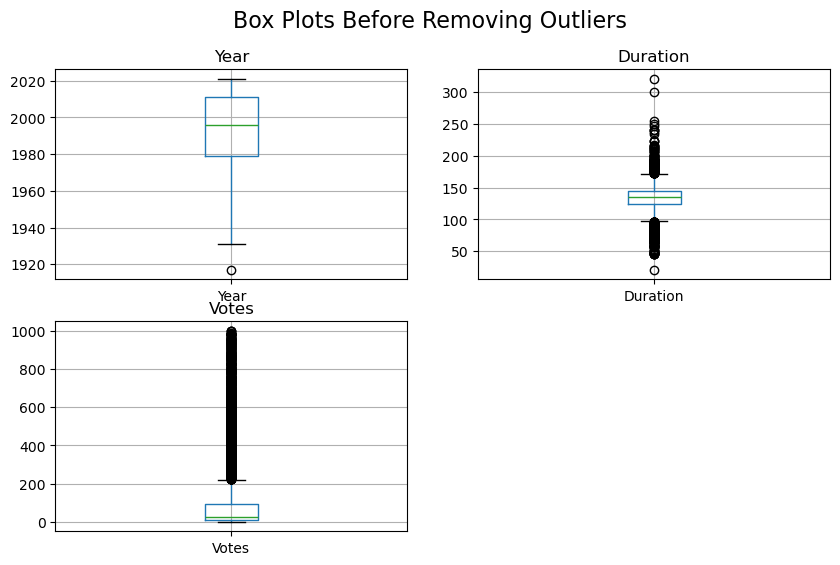

In [438]:
# we will create boxplot for 'Year','Duration','Votes' to cheack if there is outliers 
numerical_columns = ['Year', 'Duration','Votes']
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')


plt.show()

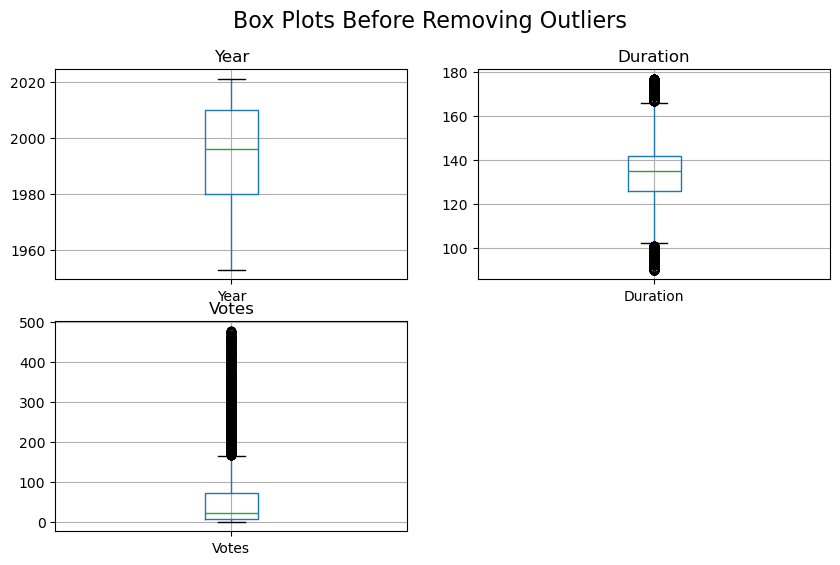

In [439]:
# we will remove the outliers and then visulize it again with boxplot (mean — 2 * std) & (mean + 2 * std)
for column in numerical_columns:
    mean = df[column].mean()
    std = df[column].std()
    low_band = mean - 2 * std
    high_band = mean + 2 * std
    df = df[(df[column] >= low_band) & (df[column] <= high_band)]
# visulize the results 
numerical_columns = ['Year', 'Duration','Votes']
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')


plt.show()

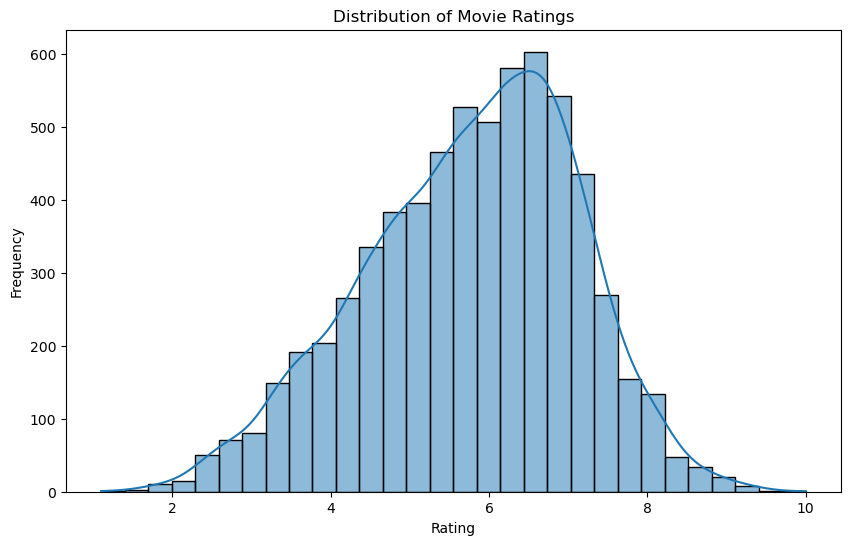

In [440]:
# rating visulization
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

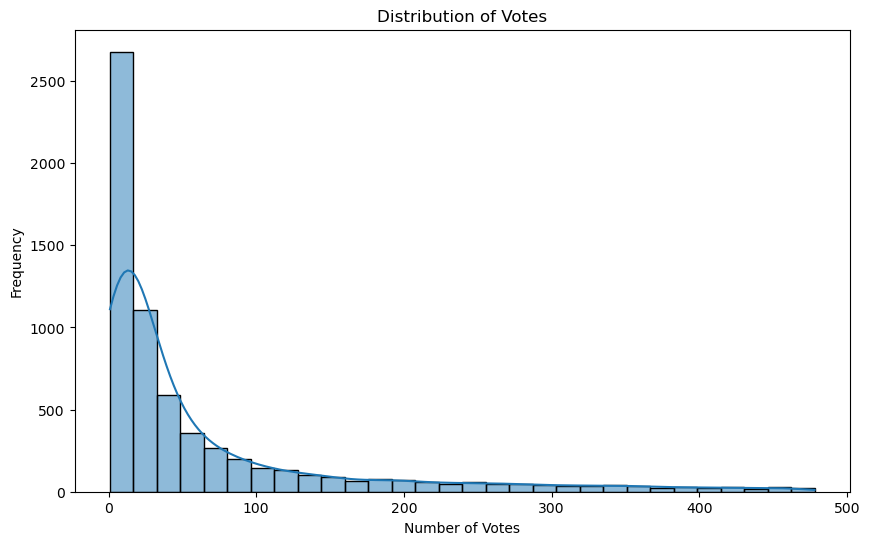

In [441]:
# Votes visulization
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Votes', bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

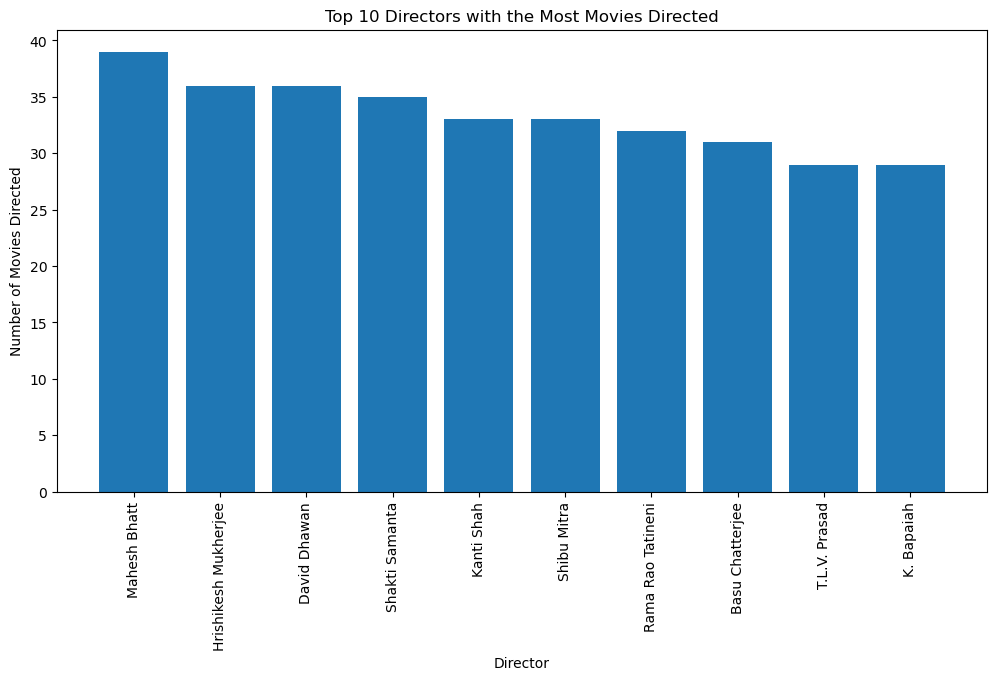

In [442]:
# visulize the top 10 'Director' 
director_counts = df['Director'].value_counts()

top_10_directors = director_counts.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, top_10_directors.values),
plt.title('Top 10 Directors with the Most Movies Directed')
plt.xlabel('Director')
plt.ylabel('Number of Movies Directed')
plt.xticks(rotation=90)
plt.show()

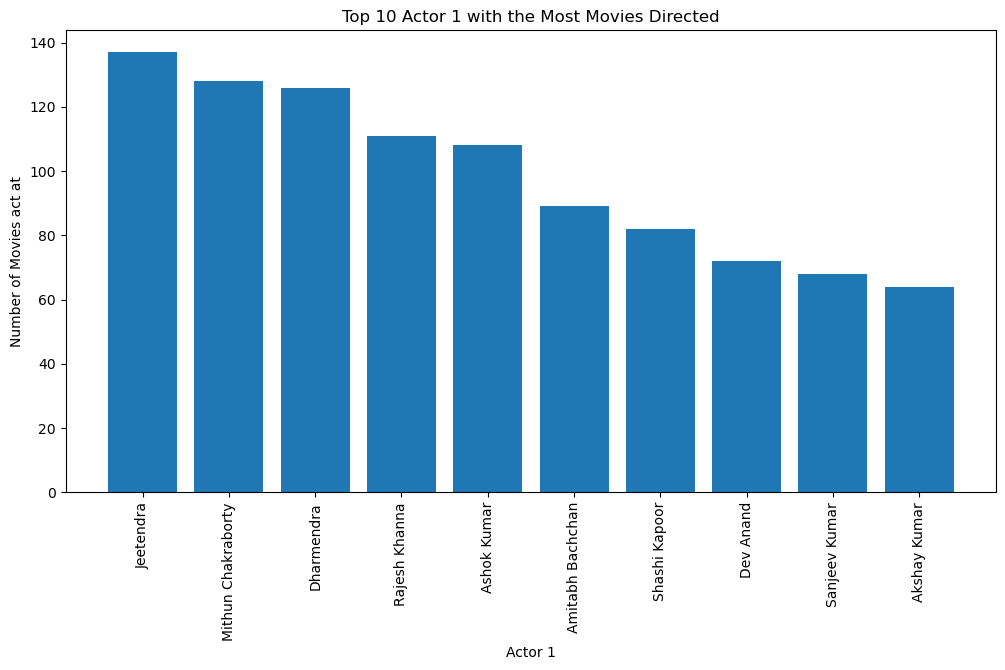

In [443]:
# visulize the top 10 'Actor 1' 
actor_1_counts = df['Actor 1'].value_counts()

top_10_actor_1 = actor_1_counts.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_actor_1.index, top_10_actor_1.values),
plt.title('Top 10 Actor 1 with the Most Movies Directed')
plt.xlabel('Actor 1')
plt.ylabel('Number of Movies act at')
plt.xticks(rotation=90)
plt.show()

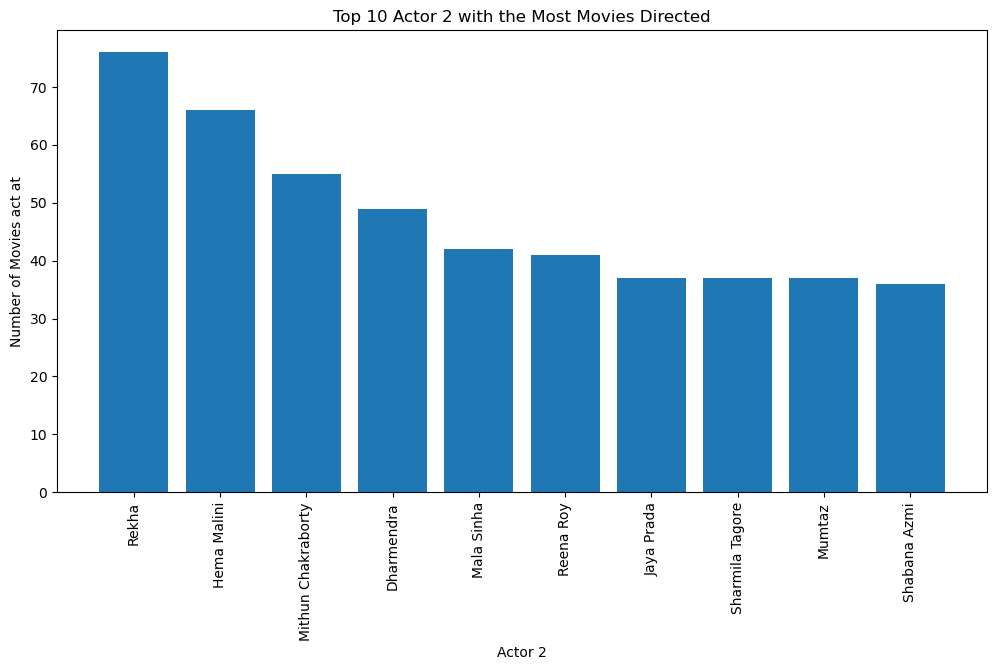

In [444]:
# visulize the top 10 'Actor 2' 
actor_2_counts = df['Actor 2'].value_counts()

top_10_actor_2 = actor_2_counts.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_actor_2.index, top_10_actor_2.values),
plt.title('Top 10 Actor 2 with the Most Movies Directed')
plt.xlabel('Actor 2')
plt.ylabel('Number of Movies act at')
plt.xticks(rotation=90)
plt.show()

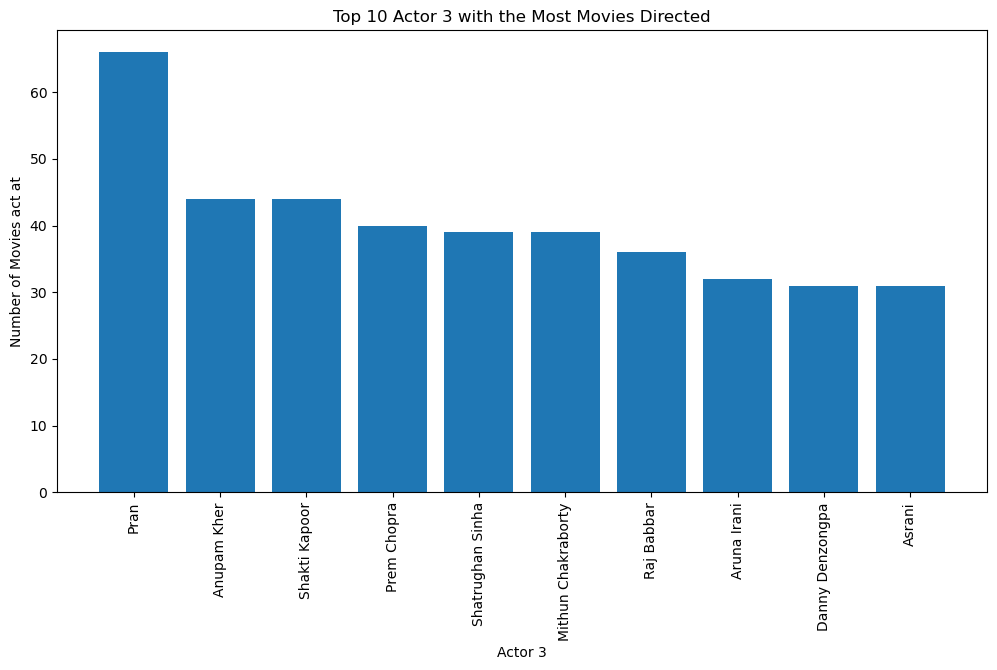

In [445]:
# visulize the top 10 'Actor 3' 
actor_3_counts = df['Actor 3'].value_counts()

top_10_actor_3 = actor_3_counts.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_actor_3.index, top_10_actor_3.values),
plt.title('Top 10 Actor 3 with the Most Movies Directed')
plt.xlabel('Actor 3')
plt.ylabel('Number of Movies act at')
plt.xticks(rotation=90)
plt.show()

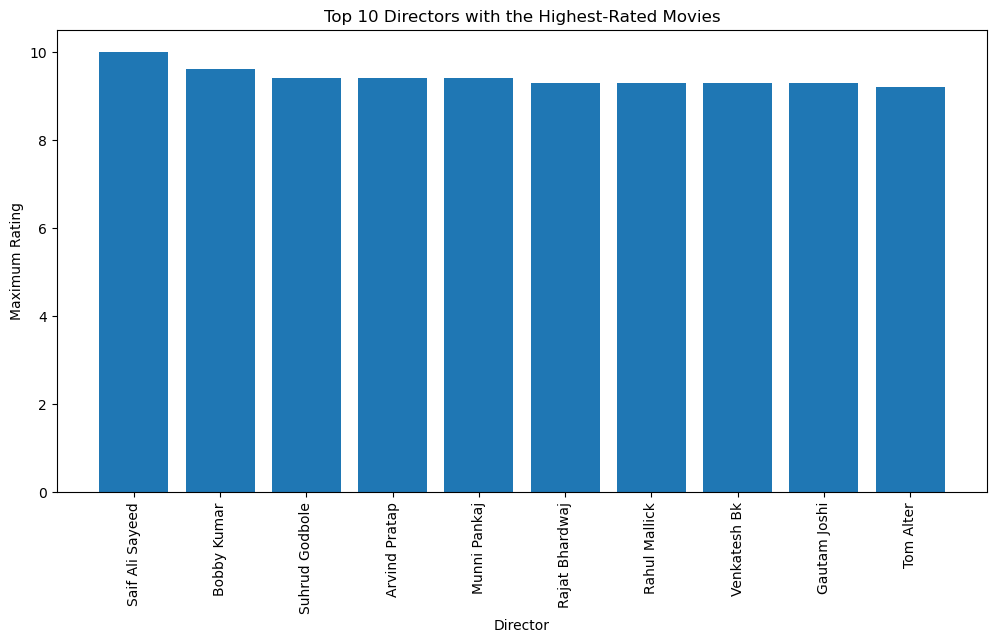

In [446]:
# visulise the directors with max ratings 
directors_max_rating = df.groupby('Director')['Rating'].max()

top_10_directors = directors_max_rating.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, top_10_directors.values)
plt.title('Top 10 Directors with the Highest-Rated Movies')
plt.xlabel('Director')
plt.ylabel('Maximum Rating')
plt.xticks(rotation=90)
plt.show()

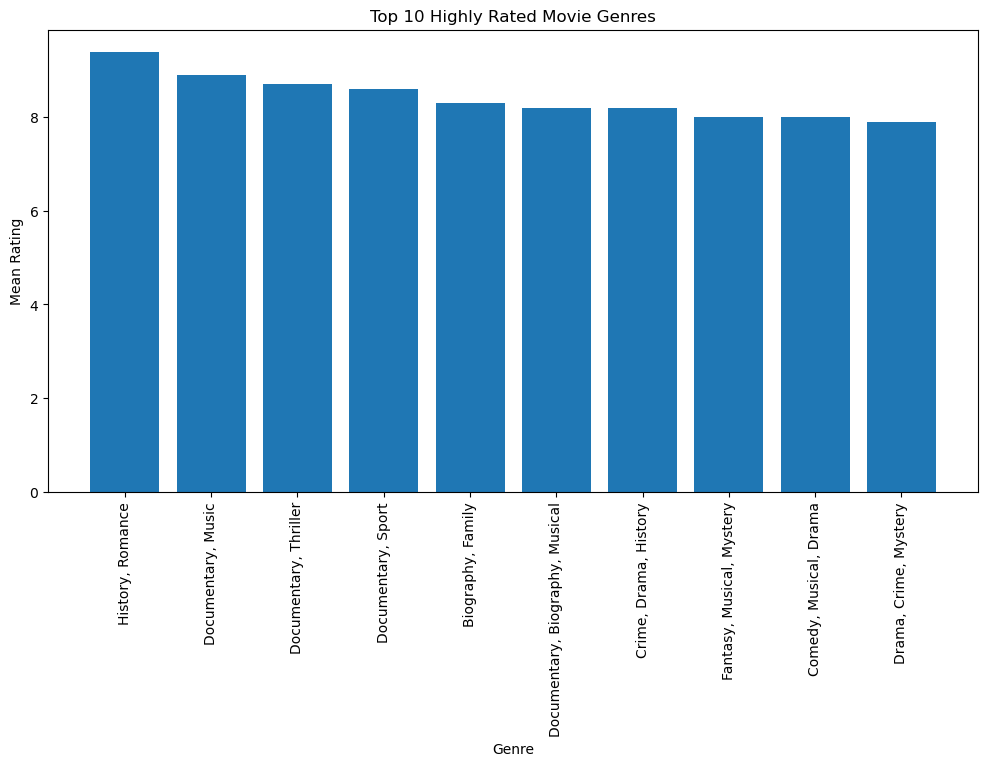

In [447]:
# visulise the genre with max ratings
genre_mean_ratings = df.groupby('Genre')['Rating'].mean()

top_10_genres = genre_mean_ratings.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_genres.index, top_10_genres.values)
plt.title('Top 10 Highly Rated Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.show()

### 4.Feature Engineering

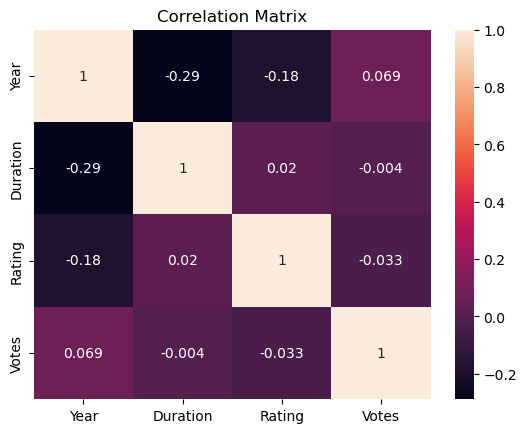

In [449]:
# Calculate the correlation matrix
columns = ['Year', 'Duration', 'Rating', 'Votes']
corr_matrix = df[columns].corr()

# Create a heatmap to visualize correlations
sns.heatmap(corr_matrix , annot=True)
plt.title('Correlation Matrix')
plt.show()

In [450]:
x = df.drop('Rating', axis=1)
y = df['Rating']

In [451]:
categorical_columns = ['Name', 'Genre', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3']

ohe = OneHotEncoder(sparse_output=False)

x_categorical_encoded = ohe.fit_transform(x[categorical_columns])

feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")

# Create a DataFrame for the encoded features
x_categorical_encoded_df = pd.DataFrame(x_categorical_encoded, columns=feature_names)
x_categorical_encoded_df.head()

,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_12 O'Clock,Name_127 B,Name_13B: Fear Has a New Address,Name_15 Park Avenue,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [452]:
# Specify the numerical columns to be scaled
numerical_columns = ['Year', 'Duration', 'Votes']

scaler = MinMaxScaler()

x_numeric_scaled = scaler.fit_transform(x[numerical_columns])

# Create a DataFrame for the scaled features
x_numeric_scaled_df = pd.DataFrame(x_numeric_scaled, columns=numerical_columns)
x_numeric_scaled_df.head()

,Year,Duration,Votes
0,0.970588,0.218391,0.014675
1,0.970588,0.229885,0.071279
2,0.764706,0.597701,0.000000
3,0.897059,0.298851,0.020964
4,0.750000,0.068966,0.033543


In [453]:
# combine the scaled columns and onehotencoded columns
x_final = pd.concat([x_numeric_scaled_df, x_categorical_encoded_df], axis=1)
x_final.head()

,Year,Duration,Votes,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_12 O'Clock,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,0.970588,0.218391,0.014675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.970588,0.229885,0.071279,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.764706,0.597701,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.897059,0.298851,0.020964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.750000,0.068966,0.033543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [454]:
scaler = MinMaxScaler()

y_scaled = scaler.fit_transform(df['Rating'].values.reshape(-1, 1))

y = pd.DataFrame(y_scaled, columns=['Rating'])
y.head()

,Rating
0,0.662921
1,0.370787
2,0.707865
3,0.325843
4,0.573034


In [455]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size=0.3, random_state=42)

### 5.Model Trining

In [457]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [458]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

y_pred_test = lr_model.predict(x_test)
y_pred_train = lr_model.predict(x_train)

In [459]:
mse = mean_squared_error(y_test, y_pred_test)  

# Print the result
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.01988840933852611


In [460]:
from sklearn.metrics import r2_score

# Calculate model accuracy using R² Score
r2 = r2_score(y_test, y_pred_test)

print(f'Model Accuracy (R² Score): {r2:.4f}')


Model Accuracy (R² Score): 0.1464


In [461]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_test = rf_model.predict(x_test)
y_pred_train = rf_model.predict(x_train)

In [462]:
# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Train R-squared (R^2) Score: {r2_train}")

Train R-squared (R^2) Score: 0.8997942484745627


### So this is the best model we can use 